# Capital Goods Principal Component Analysis (PCA) and Hierarchical Clustering

In [1]:
import pandas as pd
import numpy as np
import warnings
from sklearn.decomposition import PCA
import statsmodels.formula.api as smf
from sklearn.metrics import (r2_score, mean_squared_error, mean_squared_log_error, mean_absolute_error)
from sklearn.preprocessing import PowerTransformer
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import MiniBatchKMeans, AgglomerativeClustering
from IPython.display import display

# Import capital_goods dataframe
capital_goods=pd.read_csv('capital_goods.csv')

In [2]:
capital_goods.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3165 entries, 0 to 3164
Data columns (total 24 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   account_name                3165 non-null   object 
 1   account_id                  3165 non-null   int64  
 2   Year                        3165 non-null   int64  
 3   incorporated_country        3165 non-null   object 
 4   Primary activity            3165 non-null   object 
 5   Primary sector              3165 non-null   object 
 6   Market_Cap_USD              2821 non-null   float64
 7   Third_party_verification    3164 non-null   object 
 8   Revenue_USD                 2839 non-null   float64
 9   ebitda_USD                  2839 non-null   float64
 10  grossProfit_USD             2839 non-null   float64
 11  netIncome_USD               2839 non-null   float64
 12  cashAndCashEquivalents_USD  2839 non-null   float64
 13  shortTermInvestments_USD    2839 

In [3]:
capital_goods.head()

,account_name,account_id,Year,incorporated_country,Primary activity,Primary sector,Market_Cap_USD,Third_party_verification,Revenue_USD,ebitda_USD,...,longTermInvestments_USD,totalAssets_USD,totalLiabilities_USD,totalInvestments_USD,totalDebt_USD,totalEquity_USD,Scope_3_emissions_type,Scope_3_emissions_amount,scope_1_2_emissions_amount,Year_sq
0,Aptiv,4407,2018,United Kingdom,Electrical equipment,Electrical & electronic equipment,1.595156e+10,No third-party verification or assurance,1.443500e+10,2.260000e+09,...,9.900000e+07,1.248000e+10,8.810000e+09,1.710000e+08,4.344000e+09,3.670000e+09,Capital goods,337000.0,380471.810000,4072324
1,AstraZeneca,1104,2018,United Kingdom,Pharmaceuticals,Biotech & pharma,7.441091e+10,Third-party verification or assurance process ...,2.209000e+10,7.165000e+09,...,1.130000e+08,6.065100e+10,4.660700e+10,9.220000e+08,1.911300e+10,1.404400e+10,Capital goods,88314.0,707252.916667,4072324
2,British Land Company,2297,2018,United Kingdom,REIT,Financial services,6.501391e+09,Third-party verification or assurance process ...,1.148080e+09,-3.022600e+08,...,3.597910e+09,1.556512e+10,4.530090e+09,3.402330e+09,3.966210e+09,1.103503e+10,Capital goods,106395.0,14261.000000,4072324
3,BT Group,2377,2018,United Kingdom,Telecommunications services,"Media, telecommunications & data center services",2.997109e+10,Third-party verification or assurance process ...,2.975356e+10,9.392920e+09,...,1.282700e+08,5.878449e+10,4.587240e+10,1.282700e+08,2.143252e+10,1.291209e+10,Capital goods,448000.0,457281.895000,4072324
4,Capital & Counties Properties PLC,31426,2018,United Kingdom,Real estate owners & developers,Land & property ownership & development,NaN,Third-party verification or assurance process ...,1.017270e+08,-1.353820e+08,...,0.000000e+00,4.653407e+09,8.642350e+08,2.197100e+07,7.838440e+08,3.789172e+09,Capital goods,32356.0,1407.000000,4072324


In [4]:
# Rename features
capital_goods = capital_goods.rename(columns={'incorporated_country': 'Countries',
                                          'Primary activity': 'Primary_activity',
                                          'Primary sector': 'Primary_sector'})

# Drop unneeded columns
capital_goods = capital_goods.drop(
    ['Third_party_verification', 'Scope_3_emissions_type'], axis=1, errors='ignore')

capital_goods.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3165 entries, 0 to 3164
Data columns (total 22 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   account_name                3165 non-null   object 
 1   account_id                  3165 non-null   int64  
 2   Year                        3165 non-null   int64  
 3   Countries                   3165 non-null   object 
 4   Primary_activity            3165 non-null   object 
 5   Primary_sector              3165 non-null   object 
 6   Market_Cap_USD              2821 non-null   float64
 7   Revenue_USD                 2839 non-null   float64
 8   ebitda_USD                  2839 non-null   float64
 9   grossProfit_USD             2839 non-null   float64
 10  netIncome_USD               2839 non-null   float64
 11  cashAndCashEquivalents_USD  2839 non-null   float64
 12  shortTermInvestments_USD    2839 non-null   float64
 13  longTermInvestments_USD     2839 

In [5]:
# Looking at missing data
print(capital_goods.isnull().mean().sort_values(ascending=False).round(3) * 100)

Market_Cap_USD                10.9
cashAndCashEquivalents_USD    10.3
totalLiabilities_USD          10.3
totalEquity_USD               10.3
totalDebt_USD                 10.3
Revenue_USD                   10.3
ebitda_USD                    10.3
grossProfit_USD               10.3
netIncome_USD                 10.3
totalInvestments_USD          10.3
shortTermInvestments_USD      10.3
longTermInvestments_USD       10.3
totalAssets_USD               10.3
scope_1_2_emissions_amount     0.1
Scope_3_emissions_amount       0.0
account_name                   0.0
account_id                     0.0
Primary_sector                 0.0
Primary_activity               0.0
Countries                      0.0
Year                           0.0
Year_sq                        0.0
dtype: float64


### Principal Component Analysis (PCA) — Capital Goods

- Selects numeric features from `capital_goods`, excluding identifiers and categorical columns.
- Applies a signed log transformation to stabilize variance and handle zero/negative values.
- Drops rows with missing data to ensure valid PCA input.
- Standardizes features and fits PCA, extracting all principal components.
- Appends principal component scores (`PC1`, `PC2`, ..., `PCn`) to the original DataFrame for valid rows.
- Visualizes explained variance with scree and cumulative variance plots.
- Prints cumulative variance explained by each principal component.

_Result:_  
`capital_goods_with_pcs` contains all original columns plus principal components for downstream modeling and analysis.

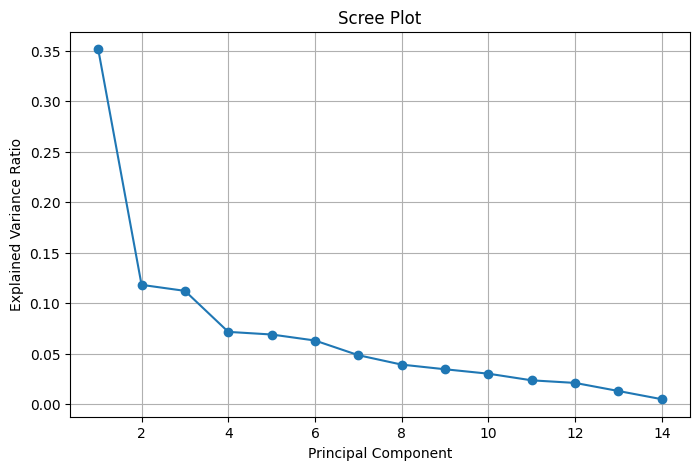

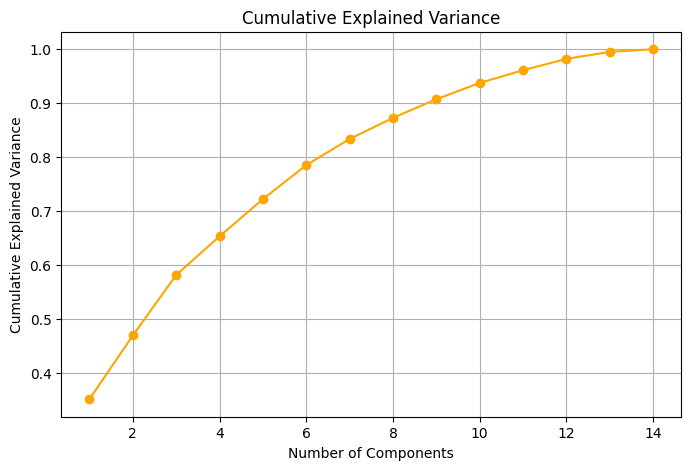

Cumulative variance explained by each additional principal component:
  PC1: 0.3514
  PC2: 0.4695
  PC3: 0.5816
  PC4: 0.6532
  PC5: 0.7222
  PC6: 0.7852
  PC7: 0.8336
  PC8: 0.8728
  PC9: 0.9073
  PC10: 0.9375
  PC11: 0.9611
  PC12: 0.9821
  PC13: 0.9951
  PC14: 1.0000


In [6]:
# --- STEP 1: Select appropriate columns for PCA ---
exclude_cols = [
    "account_id", "Year", "Year_sq",
    "account_name", "Countries", "Primary_activity", "Primary_sector"
]
numeric_cols = [
    col for col in capital_goods.columns
    if col not in exclude_cols and pd.api.types.is_numeric_dtype(capital_goods[col])
    and col != "Scope_3_emissions_amount"
]
X = capital_goods[numeric_cols].copy()

# --- STEP 2: Apply sign-log transformation ---
def sign_log_transform(x):
    return np.sign(x) * np.log1p(np.abs(x))
X_transformed = X.apply(sign_log_transform)

# --- STEP 3: Drop rows with missing values (keep track of indices) ---
X_dropped = X_transformed.dropna()
pca_indices = X_dropped.index

# --- STEP 4: Standardize the data ---
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_dropped)

# --- STEP 5: Fit PCA ---
pca = PCA()
X_pca = pca.fit_transform(X_scaled)

# --- STEP 6: Create a DataFrame for PCs, index matches original ---
num_pcs = X_pca.shape[1]
pc_columns = [f"PC{i+1}" for i in range(num_pcs)]
pcs_df = pd.DataFrame(X_pca, columns=pc_columns, index=pca_indices)

# --- STEP 7: Append PCs back to the original DataFrame (only for valid rows) ---
capital_goods_with_pcs = capital_goods.copy()
for col in pc_columns:
    capital_goods_with_pcs[col] = np.nan  # initialize with NaN

capital_goods_with_pcs.loc[pcs_df.index, pc_columns] = pcs_df

# --- Plots ---
explained_var_ratio = pca.explained_variance_ratio_

plt.figure(figsize=(8, 5))
plt.plot(range(1, len(explained_var_ratio) + 1), explained_var_ratio, marker='o')
plt.title('Scree Plot')
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance Ratio')
plt.grid(True)
plt.show()

plt.figure(figsize=(8, 5))
plt.plot(
    range(1, len(explained_var_ratio) + 1),
    np.cumsum(explained_var_ratio),
    marker='o',
    color='orange'
)
plt.title('Cumulative Explained Variance')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.grid(True)
plt.show()

# --- Print cumulative variance explained for each PC ---
cumulative_var = np.cumsum(explained_var_ratio)
print("Cumulative variance explained by each additional principal component:")
for i, var in enumerate(cumulative_var, start=1):
    print(f"  PC{i}: {var:.4f}")

# --- END ---
# capital_goods_with_pcs now contains the principal components for valid rows.

Nine pc's explains >90% of the variance in the data and PC7 explains >80% variance,  while 4 pc's is at the bottom of the "elbow" with much less significant return for each increase in number of pc's.<br>
I'll investigate 9 pc's, 7 pc's and 4 pc's performance on HLM models.

### PCA Feature Extraction & Train/Test Split — Capital Goods

- Selects numeric features from `capital_goods`, excluding identifiers and categoricals.
- Applies sign-log transformation to all numeric features.
- Drops rows with missing data to ensure valid PCA input.
- Standardizes features and fits PCA for 9, 7, and 4 components, appending results as `PC9_*`, `PC7_*`, and `PC4_*` columns.
- Adds signed log-transformed target variable: `slog_Scope_3_emissions_amount`.
- Optionally renames columns for consistency.
- Splits the final DataFrame into `train_df` (years 2018–2022) and `test_df` (year 2023), keeping only companies present in training.

_Result:_  
`capital_goods_pca` contains all principal component features and is split into train/test sets for downstream modeling.

In [7]:
# --- Prepare Data ---
exclude_cols = [
    "account_id", "Year", "Year_sq",
    "account_name", "Countries", "Primary_activity", "Primary_sector"
]
numeric_cols = [
    col for col in capital_goods.columns
    if col not in exclude_cols and pd.api.types.is_numeric_dtype(capital_goods[col])
    and col != "Scope_3_emissions_amount"
]
X = capital_goods[numeric_cols].copy()

def sign_log_transform(x):
    return np.sign(x) * np.log1p(np.abs(x))
X_transformed = X.apply(sign_log_transform)
pca_data = X_transformed.dropna().copy()
pca_data["account_id"] = capital_goods.loc[pca_data.index, "account_id"]
pca_data["Year"] = capital_goods.loc[pca_data.index, "Year"]

X_pca_input = pca_data.drop(columns=["account_id", "Year"])
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_pca_input)

# --- PCA for 9 components ---
pca9 = PCA(n_components=9)
pcs9 = pca9.fit_transform(X_scaled)
pcs9_df = pd.DataFrame(pcs9, columns=[f"PC9_{i+1}" for i in range(9)], index=pca_data.index)

# --- PCA for 7 components ---
pca7 = PCA(n_components=7)
pcs7 = pca7.fit_transform(X_scaled)
pcs7_df = pd.DataFrame(pcs7, columns=[f"PC7_{i+1}" for i in range(7)], index=pca_data.index)

# --- PCA for 4 components ---
pca4 = PCA(n_components=4)
pcs4 = pca4.fit_transform(X_scaled)
pcs4_df = pd.DataFrame(pcs4, columns=[f"PC4_{i+1}" for i in range(4)], index=pca_data.index)

# --- Merge all PC features to original DataFrame ---
capital_goods_pca = capital_goods.copy()
capital_goods_pca = capital_goods_pca.join(pcs9_df)
capital_goods_pca = capital_goods_pca.join(pcs7_df)
capital_goods_pca = capital_goods_pca.join(pcs4_df)

# --- Add transformed target and optionally other features ---
capital_goods_pca['slog_Scope_3_emissions_amount'] = sign_log_transform(capital_goods_pca['Scope_3_emissions_amount'])

# Optional: Rename columns for consistency
capital_goods_pca = capital_goods_pca.rename(columns={
    'incorporated_country': 'Countries',
    'Primary activity': 'Primary_activity',
    'Primary sector': 'Primary_sector'
})

# Now capital_goods_pca contains all PC9, PC7, and PC4 features for downstream HLM modeling

# --- Company-level split by year ---
train_df = capital_goods_pca[capital_goods_pca['Year'].between(2018, 2022)].copy()
test_df  = capital_goods_pca[capital_goods_pca['Year'] == 2023].copy()

# Keep only companies present in training
valid_companies = set(train_df['account_id'].unique())
test_df = test_df[test_df['account_id'].isin(valid_companies)].copy()

In [8]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2491 entries, 0 to 2490
Data columns (total 43 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   account_name                   2491 non-null   object 
 1   account_id                     2491 non-null   int64  
 2   Year                           2491 non-null   int64  
 3   Countries                      2491 non-null   object 
 4   Primary_activity               2491 non-null   object 
 5   Primary_sector                 2491 non-null   object 
 6   Market_Cap_USD                 2222 non-null   float64
 7   Revenue_USD                    2257 non-null   float64
 8   ebitda_USD                     2257 non-null   float64
 9   grossProfit_USD                2257 non-null   float64
 10  netIncome_USD                  2257 non-null   float64
 11  cashAndCashEquivalents_USD     2257 non-null   float64
 12  shortTermInvestments_USD       2257 non-null   float6

In [9]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 609 entries, 2491 to 3162
Data columns (total 43 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   account_name                   609 non-null    object 
 1   account_id                     609 non-null    int64  
 2   Year                           609 non-null    int64  
 3   Countries                      609 non-null    object 
 4   Primary_activity               609 non-null    object 
 5   Primary_sector                 609 non-null    object 
 6   Market_Cap_USD                 540 non-null    float64
 7   Revenue_USD                    528 non-null    float64
 8   ebitda_USD                     528 non-null    float64
 9   grossProfit_USD                528 non-null    float64
 10  netIncome_USD                  528 non-null    float64
 11  cashAndCashEquivalents_USD     528 non-null    float64
 12  shortTermInvestments_USD       528 non-null    floa

### Hierarchical Linear Mixed Model (HLM) — Capital Goods (PC9 Features)

- Uses `train_df` (years 2018–2022) and `test_df` (year 2023) derived from the capital goods data with appended PC features.
- Selects the first nine principal components (`PC9_1`–`PC9_9`) as predictors.
- Model includes country, activity, and year as additional fixed effects, and is grouped by company (`account_id`).
- Drops incomplete rows and ensures all categorical levels in test are present in training.
- Fits a mixed-effects model, computes marginal and conditional R², and evaluates predictions with metrics (MAPE, MAE, RMSE, RMSLE, etc.).
- Visualizes prediction results and feature coefficients.
- Returns metrics for downstream summary tables.

_Result:_  
A robust HLM using PC9 features for capital goods, evaluated on a company-level train/test split.

/Users/amberjensen/anaconda3/lib/python3.11/site-packages/statsmodels/regression/mixed_linear_model.py:2704: RuntimeWarning: invalid value encountered in sqrt
  sdf[0:self.k_fe, 1] = np.sqrt(np.diag(self.cov_params()[0:self.k_fe]))
/Users/amberjensen/anaconda3/lib/python3.11/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: overflow encountered in expm1
  result = getattr(ufunc, method)(*inputs, **kwargs)


                                                 Mixed Linear Model Regression Results
Model:                                MixedLM                     Dependent Variable:                     slog_Scope_3_emissions_amount
No. Observations:                     2218                        Method:                                 ML                           
No. Groups:                           576                         Scale:                                  0.7117                       
Min. group size:                      1                           Log-Likelihood:                         -3962.0302                   
Max. group size:                      5                           Converged:                              No                           
Mean group size:                      3.9                                                                                              
-------------------------------------------------------------------------------------------------

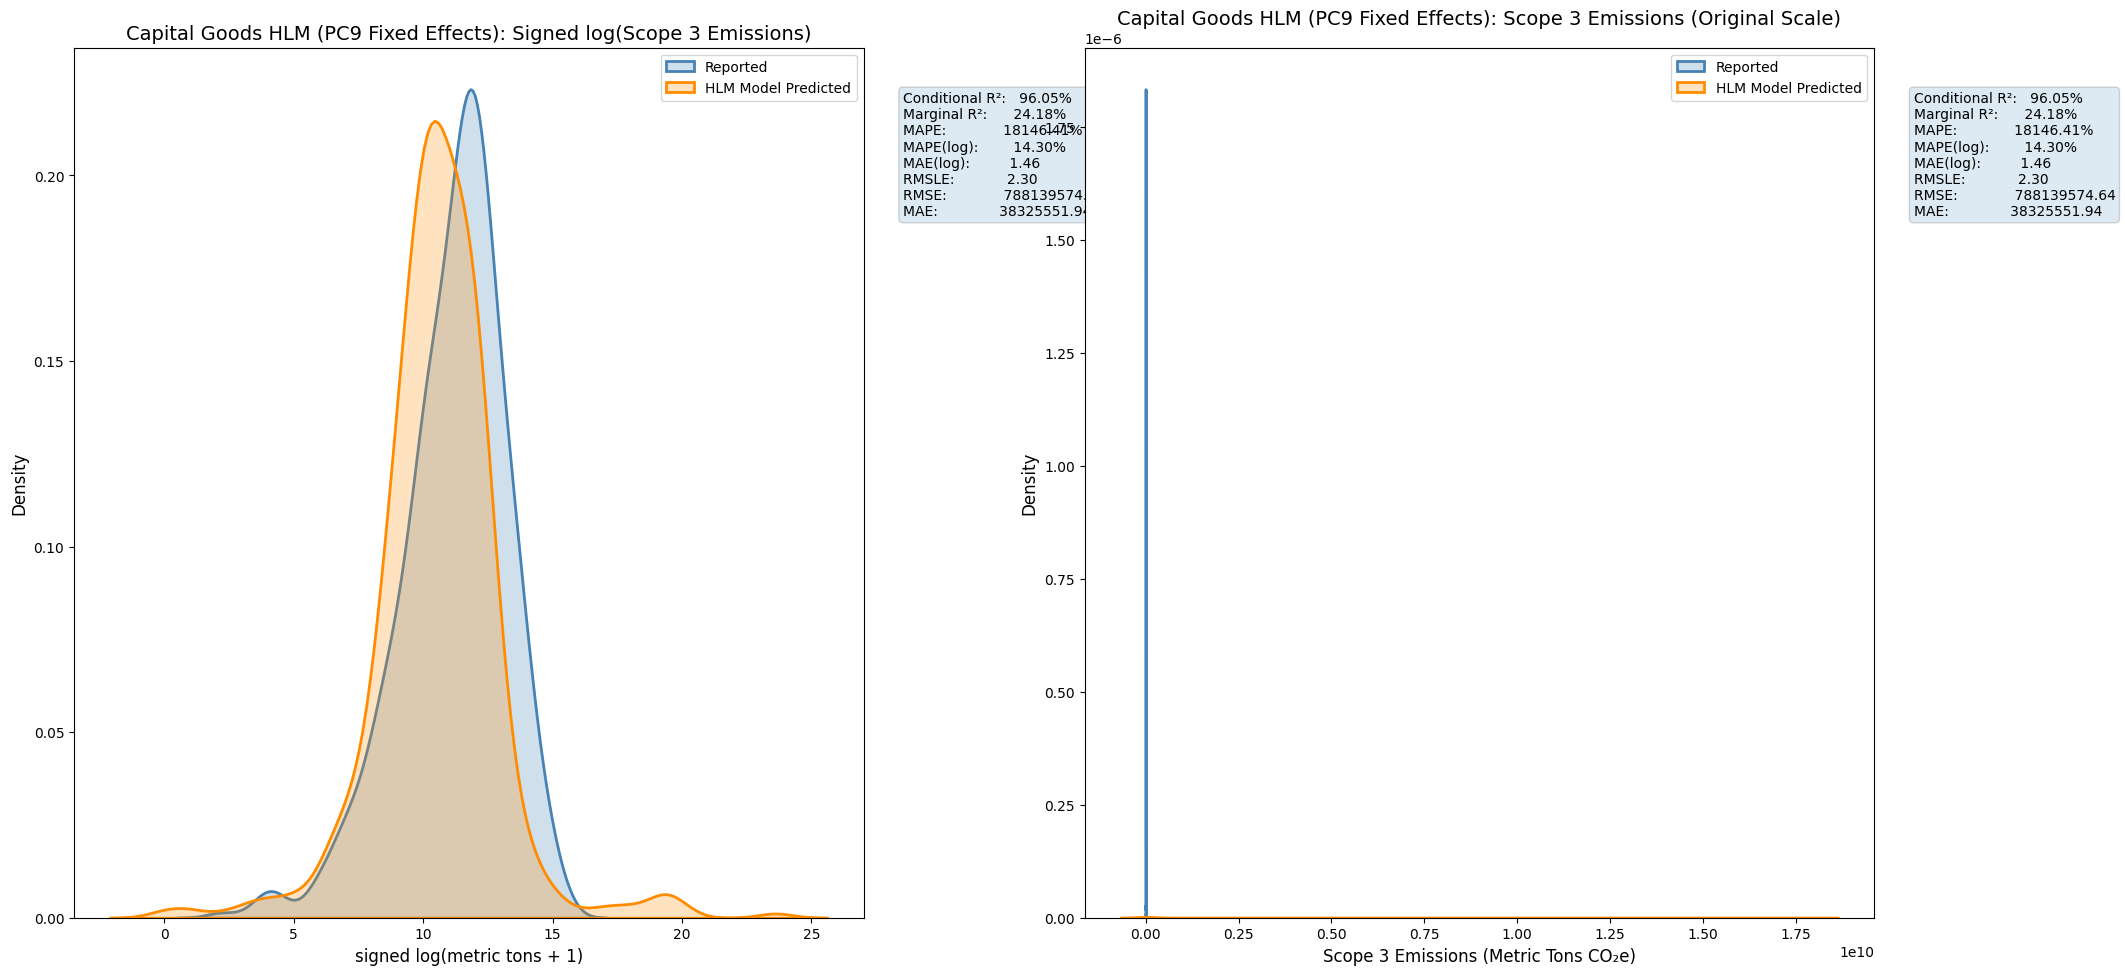

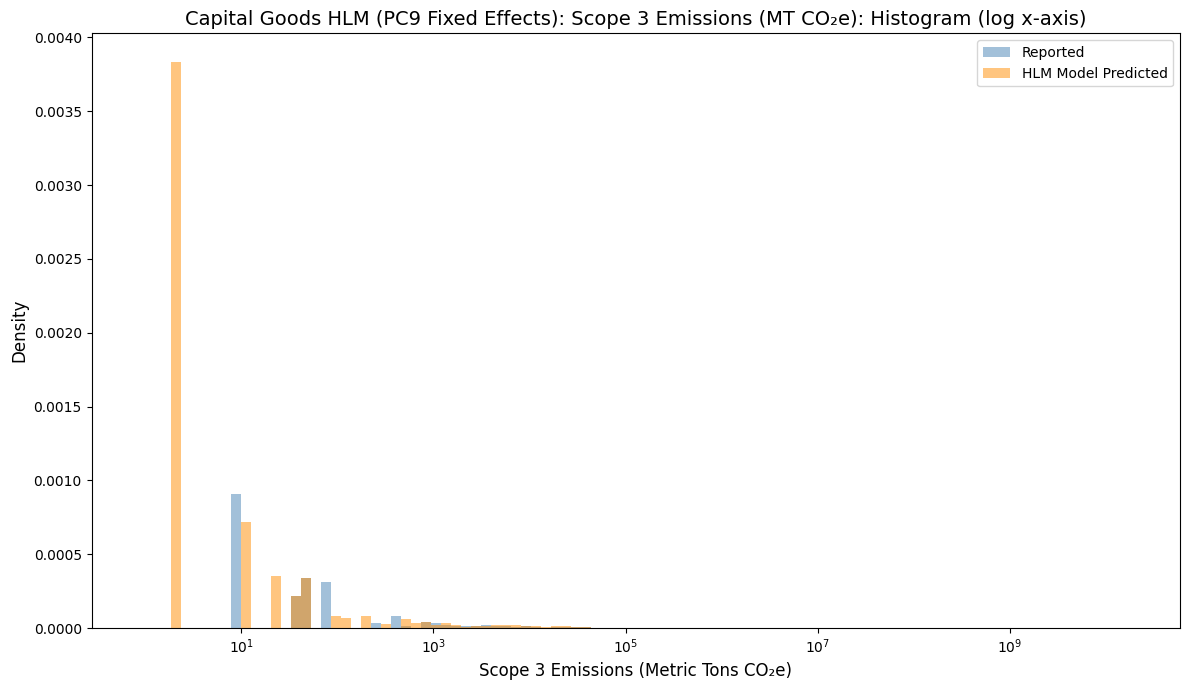

In [10]:
# --- PC9 HLM (using only PC9 features, with new train_df and test_df) ---

feature_cols_PC9 = [f'PC9_{i}' for i in range(1, 10)]
target_col_PC9 = 'slog_Scope_3_emissions_amount'
cat_cols_PC9 = ['Countries', 'Year', 'account_id', 'Primary_activity']
all_model_vars_PC9 = feature_cols_PC9 + [target_col_PC9] + cat_cols_PC9

train_df_PC9 = train_df.dropna(subset=all_model_vars_PC9).copy()
test_df_PC9 = test_df.dropna(subset=all_model_vars_PC9).copy()

# Ensure all categorical levels in test are present in train
for cat_col in ['Countries', 'Primary_activity']:
    train_cats = set(train_df_PC9[cat_col].unique())
    n_before = len(test_df_PC9)
    test_df_PC9 = test_df_PC9[test_df_PC9[cat_col].isin(train_cats)]
    n_after = len(test_df_PC9)
    if n_after < n_before:
        print(f"Warning: Dropped {n_before - n_after} test rows with unseen {cat_col} categories.")

if test_df_PC9.empty:
    print("WARNING: The filtered test set is empty. No predictions or metrics can be computed.")
else:
    fixed_effects = (
        ' + '.join(feature_cols_PC9) +
        ' + C(Countries) + C(Primary_activity) + Year'
    )
    formula = f'{target_col_PC9} ~ {fixed_effects}'

    with warnings.catch_warnings():
        warnings.filterwarnings("ignore")
        md = smf.mixedlm(formula, data=train_df_PC9, groups=train_df_PC9['account_id'])
        mdf_PC9 = md.fit(reml=False)
    print(mdf_PC9.summary())

    var_fixed = np.var(mdf_PC9.fittedvalues)
    var_resid = mdf_PC9.scale
    var_random = mdf_PC9.cov_re.iloc[0, 0] if mdf_PC9.cov_re.shape[0] > 0 else 0.0
    var_random_total = var_random

    r2_marginal = var_fixed / (var_fixed + var_random_total + var_resid)
    r2_conditional = (var_fixed + var_random_total) / (var_fixed + var_random_total + var_resid)

    print(f"Marginal R² (fixed only):      {r2_marginal:.4f}")
    print(f"Conditional R² (fixed+random): {r2_conditional:.4f}")

    test_df_PC9['predicted_log'] = mdf_PC9.predict(test_df_PC9)
    test_df_PC9['predicted'] = np.sign(test_df_PC9['predicted_log']) * (np.expm1(np.abs(test_df_PC9['predicted_log'])))

    y_true_log = test_df_PC9[target_col_PC9]
    y_pred_log = test_df_PC9['predicted_log']
    y_true = np.sign(y_true_log) * (np.expm1(np.abs(y_true_log)))
    y_pred = test_df_PC9['predicted']

    mask = (
        np.isfinite(y_true_log) & np.isfinite(y_pred_log) &
        np.isfinite(y_true) & np.isfinite(y_pred)
    )
    y_true_log = y_true_log[mask]
    y_pred_log = y_pred_log[mask]
    y_true = y_true[mask]
    y_pred = y_pred[mask]

    r2_log_pct = r2_score(y_true_log, y_pred_log) * 100
    r2_pct = r2_score(y_true, y_pred) * 100
    mape_log = np.mean(np.abs((y_true_log - y_pred_log) / np.clip(y_true_log, 1e-8, None))) * 100
    mape_orig = np.mean(np.abs((y_true - y_pred) / np.clip(y_true, 1e-8, None))) * 100
    rmsle = np.sqrt(mean_squared_log_error(np.abs(y_true) + 1, np.abs(y_pred) + 1))
    rmse_orig = np.sqrt(mean_squared_error(y_true, y_pred))
    mae_orig = mean_absolute_error(y_true, y_pred)
    mae_log = mean_absolute_error(y_true_log, y_pred_log)

    metrics_text = (
        f"Conditional R²:   {r2_conditional*100:.2f}%\n"
        f"Marginal R²:      {r2_marginal*100:.2f}%\n"
        f"MAPE:             {mape_orig:.2f}%\n"
        f"MAPE(log):        {mape_log:.2f}%\n"
        f"MAE(log):         {mae_log:.2f}\n"
        f"RMSLE:            {rmsle:.2f}\n"
        f"RMSE:             {rmse_orig:.2f}\n"
        f"MAE:              {mae_orig:.2f}"
    )

    print("\nCapital Goods HLM with PC9 Fixed Effects: Test Set Performance Metrics:")
    print(metrics_text)

    coef_df = pd.DataFrame({
        'coef': mdf_PC9.params,
        'pvalue': mdf_PC9.pvalues
    }).drop(index="Intercept", errors='ignore').sort_values(by="pvalue")
    print("\nTop Influential Features (by p-value):")
    print(coef_df.head(10))
    print("\nAll feature coefficients sorted by absolute value:")
    print(coef_df.reindex(coef_df['coef'].abs().sort_values(ascending=False).index))

    fig, axes = plt.subplots(1, 2, figsize=(20, 10))
    text_fontsize = 10
    legend_fontsize = 10
    if y_pred_log.nunique() > 1:
        sns.kdeplot(y_true_log, label='Reported', linewidth=2, fill=True, ax=axes[0], color='steelblue')
        sns.kdeplot(y_pred_log, label='HLM Model Predicted', linewidth=2, fill=True, ax=axes[0], color='darkorange')
    else:
        sns.kdeplot(y_true_log, label='Reported', linewidth=2, fill=True, ax=axes[0], color='steelblue')
        axes[0].plot([], [], ' ', label="Predicted: constant value (no KDE)")
    axes[0].set_title("Capital Goods HLM (PC9 Fixed Effects): Signed log(Scope 3 Emissions)", fontsize=14)
    axes[0].set_xlabel("signed log(metric tons + 1)", fontsize=12)
    axes[0].set_ylabel("Density", fontsize=12)
    axes[0].legend(fontsize=legend_fontsize)
    axes[0].text(1.05, 0.95, metrics_text, transform=axes[0].transAxes,
                 verticalalignment='top', fontsize=text_fontsize, bbox=dict(boxstyle='round', alpha=0.15))
    if y_pred.nunique() > 1:
        sns.kdeplot(y_true, label='Reported', linewidth=2, fill=True, ax=axes[1], color='steelblue')
        sns.kdeplot(y_pred, label='HLM Model Predicted', linewidth=2, fill=True, ax=axes[1], color='darkorange')
    else:
        sns.kdeplot(y_true, label='Reported', linewidth=2, fill=True, ax=axes[1], color='steelblue')
        axes[1].plot([], [], ' ', label="Predicted: constant value (no KDE)")
    axes[1].set_title("Capital Goods HLM (PC9 Fixed Effects): Scope 3 Emissions (Original Scale)", fontsize=14)
    axes[1].set_xlabel("Scope 3 Emissions (Metric Tons CO₂e)", fontsize=12)
    axes[1].set_ylabel("Density", fontsize=12)
    axes[1].legend(fontsize=legend_fontsize)
    axes[1].text(1.05, 0.95, metrics_text, transform=axes[1].transAxes,
                 verticalalignment='top', fontsize=text_fontsize, bbox=dict(boxstyle='round', alpha=0.15))
    plt.subplots_adjust(left=0.08, right=0.98, top=0.95, bottom=0.08, wspace=0.28)
    plt.show()

    valid_hist_mask = np.isfinite(y_true) & np.isfinite(y_pred) & (y_true > -1) & (y_pred > -1)
    y_true_hist = y_true[valid_hist_mask]
    y_pred_hist = y_pred[valid_hist_mask]
    if len(y_true_hist) > 0 and len(y_pred_hist) > 0:
        min_val = min(y_true_hist.min(), y_pred_hist.min())
        max_val = max(y_true_hist.max(), y_pred_hist.max())
        if np.isfinite(min_val) and np.isfinite(max_val) and (min_val + 1) > 0 and (max_val + 1) > 0:
            log_bins = np.logspace(np.log10(min_val + 1), np.log10(max_val + 1), 100)
            plt.figure(figsize=(12, 7))
            sns.histplot(y_true_hist, bins=log_bins, stat="density", color="steelblue", alpha=0.5, label="Reported")
            sns.histplot(y_pred_hist, bins=log_bins, stat="density", color="darkorange", alpha=0.5, label="HLM Model Predicted")
            plt.xscale("log")
            plt.title("Capital Goods HLM (PC9 Fixed Effects): Scope 3 Emissions (MT CO₂e): Histogram (log x-axis)", fontsize=14)
            plt.xlabel("Scope 3 Emissions (Metric Tons CO₂e)", fontsize=12)
            plt.ylabel("Density", fontsize=12)
            plt.legend(fontsize=legend_fontsize)
            plt.tight_layout()
            plt.show()
        else:
            print("Error: min_val or max_val invalid for log scaling.")
    else:
        print("Error: No valid y_true/y_pred values for histogram.")

    PC9_model_metrics = {
        "Model": "HLM PC9",
        "Conditional_R2": r2_conditional,
        "Marginal_R2": r2_marginal,
        "RMSE": rmse_orig,
        "MAE": mae_orig,
        "MAE_log": mae_log,
        "RMSLE": rmsle,
        "MAPE": mape_orig,
        "# Obs (train)": len(train_df_PC9),
        "# Obs (test)": len(test_df_PC9),
        "# Obs (train/test)": f"{len(train_df_PC9)}/{len(test_df_PC9)}"
    }

In [11]:
print("y_true min/max:", y_true.min(), y_true.max())
print("y_pred min/max:", y_pred.min(), y_pred.max())
print("Any NaNs in y_true?", np.any(np.isnan(y_true)))
print("Any NaNs in y_pred?", np.any(np.isnan(y_pred)))
print("Any Infs in y_true?", np.any(np.isinf(y_true)))
print("Any Infs in y_pred?", np.any(np.isinf(y_pred)))
print("# Obs (train):", len(train_df_PC9))
print("# Obs (test):", len(test_df_PC9))

y_true min/max: 8.260000000000002 4563000.000000001
y_pred min/max: -0.09326773377982928 17957515498.235836
Any NaNs in y_true? False
Any NaNs in y_pred? False
Any Infs in y_true? False
Any Infs in y_pred? False
# Obs (train): 2218
# Obs (test): 521


This model is predicting very large, unreasonable predictions and has a slightly negative prediction, which is not normal for emissions data.  It has also not converged.  There are likely too many features included, leading to multicollinarity issues.  I'll try PC7 analysis.

In [12]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2491 entries, 0 to 2490
Data columns (total 43 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   account_name                   2491 non-null   object 
 1   account_id                     2491 non-null   int64  
 2   Year                           2491 non-null   int64  
 3   Countries                      2491 non-null   object 
 4   Primary_activity               2491 non-null   object 
 5   Primary_sector                 2491 non-null   object 
 6   Market_Cap_USD                 2222 non-null   float64
 7   Revenue_USD                    2257 non-null   float64
 8   ebitda_USD                     2257 non-null   float64
 9   grossProfit_USD                2257 non-null   float64
 10  netIncome_USD                  2257 non-null   float64
 11  cashAndCashEquivalents_USD     2257 non-null   float64
 12  shortTermInvestments_USD       2257 non-null   float6

### Hierarchical Linear Mixed Model (HLM) — Capital Goods (PC7 Features)

- Uses `train_df` (years 2018–2022) and `test_df` (year 2023) derived from the capital goods data with appended PC7 features.
- Selects the first seven principal components (`PC7_1`–`PC7_7`) as predictors.
- Includes country, activity, and year as fixed effects, grouped by company (`account_id`).
- Drops incomplete rows and ensures all categorical levels in test are present in training.
- Fits a mixed-effects model, computes marginal and conditional R², and evaluates predictions with standard metrics (MAPE, MAE, RMSE, RMSLE, etc.).
- Visualizes prediction results and feature coefficients.
- Returns metrics for downstream summary tables.

_Result:_  
A robust HLM using PC7 features for capital goods, evaluated on a company-level train/test split.

                                                                    Mixed Linear Model Regression Results
Model:                                             MixedLM                                  Dependent Variable:                                  slog_Scope_3_emissions_amount
No. Observations:                                  2218                                     Method:                                              ML                           
No. Groups:                                        576                                      Scale:                                               0.7953                       
Min. group size:                                   1                                        Log-Likelihood:                                      -3517.8835                   
Max. group size:                                   5                                        Converged:                                           Yes                          
Mean group size:   

/Users/amberjensen/anaconda3/lib/python3.11/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: overflow encountered in expm1
  result = getattr(ufunc, method)(*inputs, **kwargs)


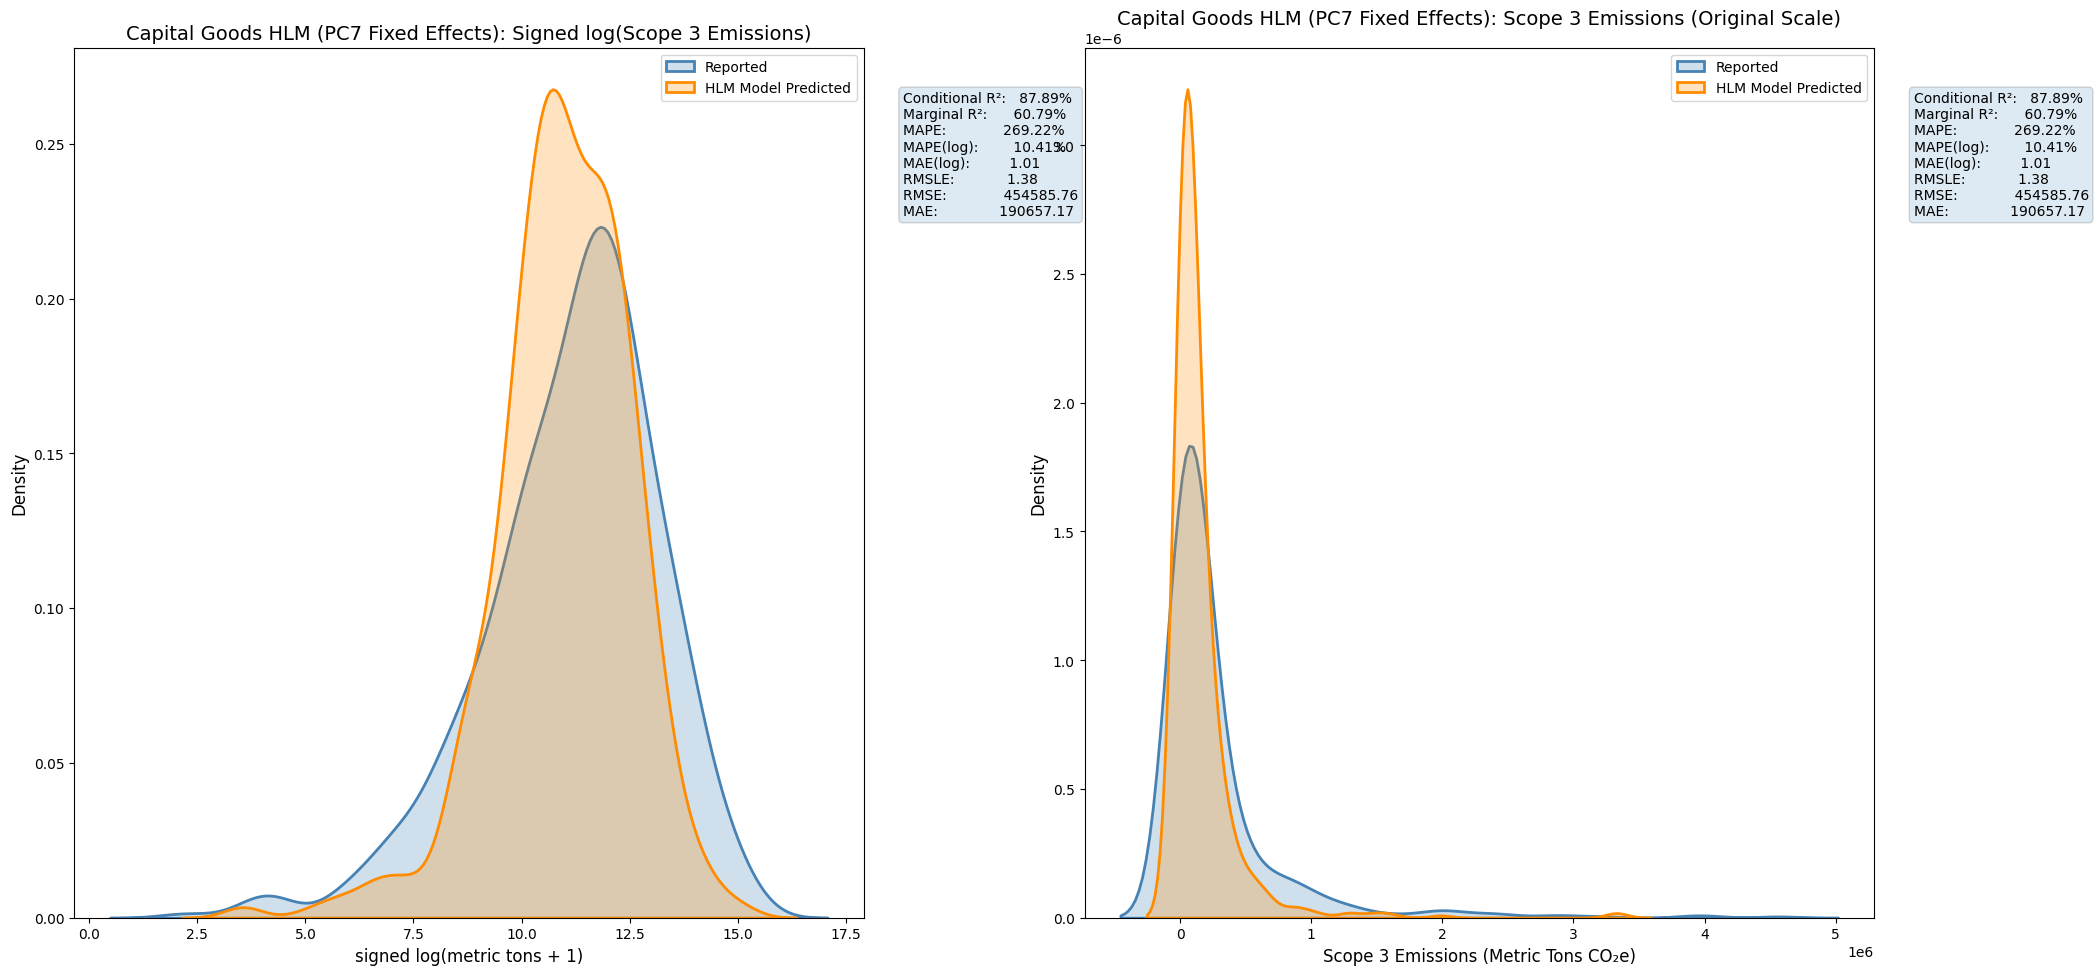

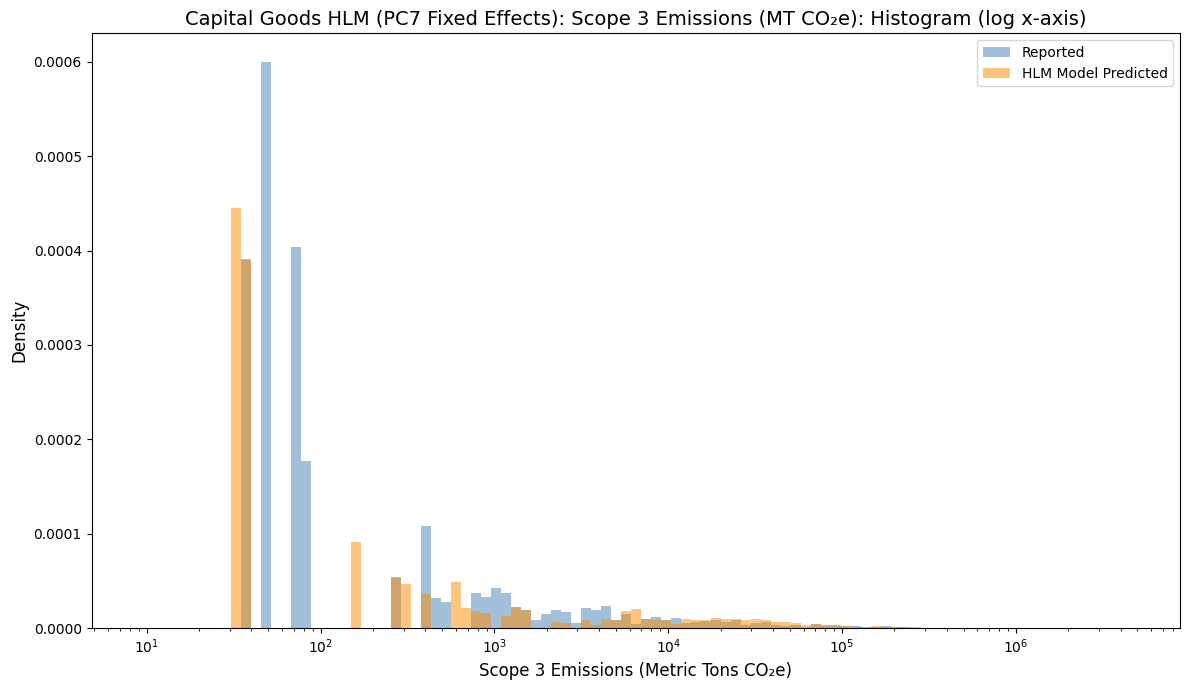

In [13]:
# --- PC7 HLM (using only PC7 features, with new train_df and test_df) ---

feature_cols_PC7 = [f'PC7_{i}' for i in range(1, 8)]
target_col_PC7 = 'slog_Scope_3_emissions_amount'
cat_cols_PC7 = ['Countries', 'Year', 'account_id', 'Primary_activity']
all_model_vars_PC7 = feature_cols_PC7 + [target_col_PC7] + cat_cols_PC7

train_df_PC7 = train_df.dropna(subset=all_model_vars_PC7).copy()
test_df_PC7 = test_df.dropna(subset=all_model_vars_PC7).copy()

# Ensure all categorical levels in test are present in train
for cat_col in ['Countries', 'Primary_activity']:
    train_cats = set(train_df_PC7[cat_col].unique())
    n_before = len(test_df_PC7)
    test_df_PC7 = test_df_PC7[test_df_PC7[cat_col].isin(train_cats)]
    n_after = len(test_df_PC7)
    if n_after < n_before:
        print(f"Warning: Dropped {n_before - n_after} test rows with unseen {cat_col} categories.")

if test_df_PC7.empty:
    print("WARNING: The filtered test set is empty. No predictions or metrics can be computed.")
else:
    fixed_effects = (
        ' + '.join(feature_cols_PC7) +
        ' + C(Countries) + C(Primary_activity) + Year'
    )
    formula = f'{target_col_PC7} ~ {fixed_effects}'

    with warnings.catch_warnings():
        warnings.filterwarnings("ignore")
        md = smf.mixedlm(formula, data=train_df_PC7, groups=train_df_PC7['account_id'])
        mdf_PC7 = md.fit(reml=False)
    print(mdf_PC7.summary())

    var_fixed = np.var(mdf_PC7.fittedvalues)
    var_resid = mdf_PC7.scale
    var_random = mdf_PC7.cov_re.iloc[0, 0] if mdf_PC7.cov_re.shape[0] > 0 else 0.0
    var_random_total = var_random

    r2_marginal = var_fixed / (var_fixed + var_random_total + var_resid)
    r2_conditional = (var_fixed + var_random_total) / (var_fixed + var_random_total + var_resid)

    print(f"Marginal R² (fixed only):      {r2_marginal:.4f}")
    print(f"Conditional R² (fixed+random): {r2_conditional:.4f}")

    test_df_PC7['predicted_log'] = mdf_PC7.predict(test_df_PC7)
    test_df_PC7['predicted'] = np.sign(test_df_PC7['predicted_log']) * (np.expm1(np.abs(test_df_PC7['predicted_log'])))

    y_true_log = test_df_PC7[target_col_PC7]
    y_pred_log = test_df_PC7['predicted_log']
    y_true = np.sign(y_true_log) * (np.expm1(np.abs(y_true_log)))
    y_pred = test_df_PC7['predicted']

    mask = (
        np.isfinite(y_true_log) & np.isfinite(y_pred_log) &
        np.isfinite(y_true) & np.isfinite(y_pred)
    )
    y_true_log = y_true_log[mask]
    y_pred_log = y_pred_log[mask]
    y_true = y_true[mask]
    y_pred = y_pred[mask]

    r2_log_pct = r2_score(y_true_log, y_pred_log) * 100
    r2_pct = r2_score(y_true, y_pred) * 100
    mape_log = np.mean(np.abs((y_true_log - y_pred_log) / np.clip(y_true_log, 1e-8, None))) * 100
    mape_orig = np.mean(np.abs((y_true - y_pred) / np.clip(y_true, 1e-8, None))) * 100
    rmsle = np.sqrt(mean_squared_log_error(np.abs(y_true) + 1, np.abs(y_pred) + 1))
    rmse_orig = np.sqrt(mean_squared_error(y_true, y_pred))
    mae_orig = mean_absolute_error(y_true, y_pred)
    mae_log = mean_absolute_error(y_true_log, y_pred_log)

    metrics_text = (
        f"Conditional R²:   {r2_conditional*100:.2f}%\n"
        f"Marginal R²:      {r2_marginal*100:.2f}%\n"
        f"MAPE:             {mape_orig:.2f}%\n"
        f"MAPE(log):        {mape_log:.2f}%\n"
        f"MAE(log):         {mae_log:.2f}\n"
        f"RMSLE:            {rmsle:.2f}\n"
        f"RMSE:             {rmse_orig:.2f}\n"
        f"MAE:              {mae_orig:.2f}"
    )

    print("\nCapital Goods HLM with PC7 Fixed Effects: Test Set Performance Metrics:")
    print(metrics_text)

    coef_df = pd.DataFrame({
        'coef': mdf_PC7.params,
        'pvalue': mdf_PC7.pvalues
    }).drop(index="Intercept", errors='ignore').sort_values(by="pvalue")
    print("\nTop Influential Features (by p-value):")
    print(coef_df.head(10))
    print("\nAll feature coefficients sorted by absolute value:")
    print(coef_df.reindex(coef_df['coef'].abs().sort_values(ascending=False).index))

    fig, axes = plt.subplots(1, 2, figsize=(20, 10))
    text_fontsize = 10
    legend_fontsize = 10
    if y_pred_log.nunique() > 1:
        sns.kdeplot(y_true_log, label='Reported', linewidth=2, fill=True, ax=axes[0], color='steelblue')
        sns.kdeplot(y_pred_log, label='HLM Model Predicted', linewidth=2, fill=True, ax=axes[0], color='darkorange')
    else:
        sns.kdeplot(y_true_log, label='Reported', linewidth=2, fill=True, ax=axes[0], color='steelblue')
        axes[0].plot([], [], ' ', label="Predicted: constant value (no KDE)")
    axes[0].set_title("Capital Goods HLM (PC7 Fixed Effects): Signed log(Scope 3 Emissions)", fontsize=14)
    axes[0].set_xlabel("signed log(metric tons + 1)", fontsize=12)
    axes[0].set_ylabel("Density", fontsize=12)
    axes[0].legend(fontsize=legend_fontsize)
    axes[0].text(1.05, 0.95, metrics_text, transform=axes[0].transAxes,
                 verticalalignment='top', fontsize=text_fontsize, bbox=dict(boxstyle='round', alpha=0.15))
    if y_pred.nunique() > 1:
        sns.kdeplot(y_true, label='Reported', linewidth=2, fill=True, ax=axes[1], color='steelblue')
        sns.kdeplot(y_pred, label='HLM Model Predicted', linewidth=2, fill=True, ax=axes[1], color='darkorange')
    else:
        sns.kdeplot(y_true, label='Reported', linewidth=2, fill=True, ax=axes[1], color='steelblue')
        axes[1].plot([], [], ' ', label="Predicted: constant value (no KDE)")
    axes[1].set_title("Capital Goods HLM (PC7 Fixed Effects): Scope 3 Emissions (Original Scale)", fontsize=14)
    axes[1].set_xlabel("Scope 3 Emissions (Metric Tons CO₂e)", fontsize=12)
    axes[1].set_ylabel("Density", fontsize=12)
    axes[1].legend(fontsize=legend_fontsize)
    axes[1].text(1.05, 0.95, metrics_text, transform=axes[1].transAxes,
                 verticalalignment='top', fontsize=text_fontsize, bbox=dict(boxstyle='round', alpha=0.15))
    plt.subplots_adjust(left=0.08, right=0.98, top=0.95, bottom=0.08, wspace=0.28)
    plt.show()

    valid_hist_mask = np.isfinite(y_true) & np.isfinite(y_pred) & (y_true > -1) & (y_pred > -1)
    y_true_hist = y_true[valid_hist_mask]
    y_pred_hist = y_pred[valid_hist_mask]
    if len(y_true_hist) > 0 and len(y_pred_hist) > 0:
        min_val = min(y_true_hist.min(), y_pred_hist.min())
        max_val = max(y_true_hist.max(), y_pred_hist.max())
        if np.isfinite(min_val) and np.isfinite(max_val) and (min_val + 1) > 0 and (max_val + 1) > 0:
            log_bins = np.logspace(np.log10(min_val + 1), np.log10(max_val + 1), 100)
            plt.figure(figsize=(12, 7))
            sns.histplot(y_true_hist, bins=log_bins, stat="density", color="steelblue", alpha=0.5, label="Reported")
            sns.histplot(y_pred_hist, bins=log_bins, stat="density", color="darkorange", alpha=0.5, label="HLM Model Predicted")
            plt.xscale("log")
            plt.title("Capital Goods HLM (PC7 Fixed Effects): Scope 3 Emissions (MT CO₂e): Histogram (log x-axis)", fontsize=14)
            plt.xlabel("Scope 3 Emissions (Metric Tons CO₂e)", fontsize=12)
            plt.ylabel("Density", fontsize=12)
            plt.legend(fontsize=legend_fontsize)
            plt.tight_layout()
            plt.show()
        else:
            print("Error: min_val or max_val invalid for log scaling.")
    else:
        print("Error: No valid y_true/y_pred values for histogram.")

    PC7_model_metrics = {
        "Model": "HLM PC7",
        "Conditional_R2": r2_conditional,
        "Marginal_R2": r2_marginal,
        "RMSE": rmse_orig,
        "MAE": mae_orig,
        "MAE_log": mae_log,
        "RMSLE": rmsle,
        "MAPE": mape_orig,
        "# Obs (train)": len(train_df_PC7),
        "# Obs (test)": len(test_df_PC7),
        "# Obs (train/test)": f"{len(train_df_PC7)}/{len(test_df_PC7)}"
    }

In [14]:
print("y_true min/max:", y_true.min(), y_true.max())
print("y_pred min/max:", y_pred.min(), y_pred.max())
print("Any NaNs in y_true?", np.any(np.isnan(y_true)))
print("Any NaNs in y_pred?", np.any(np.isnan(y_pred)))
print("Any Infs in y_true?", np.any(np.isinf(y_true)))
print("Any Infs in y_pred?", np.any(np.isinf(y_pred)))
print("# Obs (train):", len(train_df_PC7))
print("# Obs (test):", len(test_df_PC7))

y_true min/max: 8.260000000000002 4563000.000000001
y_pred min/max: 31.989040293777183 3337828.823751389
Any NaNs in y_true? False
Any NaNs in y_pred? False
Any Infs in y_true? False
Any Infs in y_pred? False
# Obs (train): 2218
# Obs (test): 521


The PC7 HLM model converged and had a warning likely due to large values or multicollinearity.  Let's see how PC4 performs.

### Hierarchical Linear Mixed Model (HLM) — Capital Goods (PC4 Features)

- Uses `train_df` (years 2018–2022) and `test_df` (year 2023) derived from the capital goods data with appended PC4 features.
- Selects the first four principal components (`PC4_1`–`PC4_4`) as predictors.
- Includes country, primary activity, and centered year as fixed effects, grouped by company (`account_id`).
- Drops incomplete rows and ensures all categorical levels in test are present in training.
- Fits a mixed-effects model, computes marginal and conditional R², and evaluates predictions with standard metrics (MAPE, MAE, RMSE, RMSLE, etc.).
- Visualizes prediction results and feature coefficients.
- Returns metrics for downstream summary tables.

_Result:_  
A robust HLM using PC4 features for capital goods, evaluated on a company-level train/test split.

/Users/amberjensen/anaconda3/lib/python3.11/site-packages/statsmodels/regression/mixed_linear_model.py:2704: RuntimeWarning: invalid value encountered in sqrt
  sdf[0:self.k_fe, 1] = np.sqrt(np.diag(self.cov_params()[0:self.k_fe]))
/Users/amberjensen/anaconda3/lib/python3.11/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: overflow encountered in expm1
  result = getattr(ufunc, method)(*inputs, **kwargs)


                                               Mixed Linear Model Regression Results
Model:                                MixedLM                   Dependent Variable:                   slog_Scope_3_emissions_amount
No. Observations:                     2218                      Method:                               ML                           
No. Groups:                           576                       Scale:                                0.9728                       
Min. group size:                      1                         Log-Likelihood:                       -3551.5760                   
Max. group size:                      5                         Converged:                            Yes                          
Mean group size:                      3.9                                                                                          
---------------------------------------------------------------------------------------------------------------------------

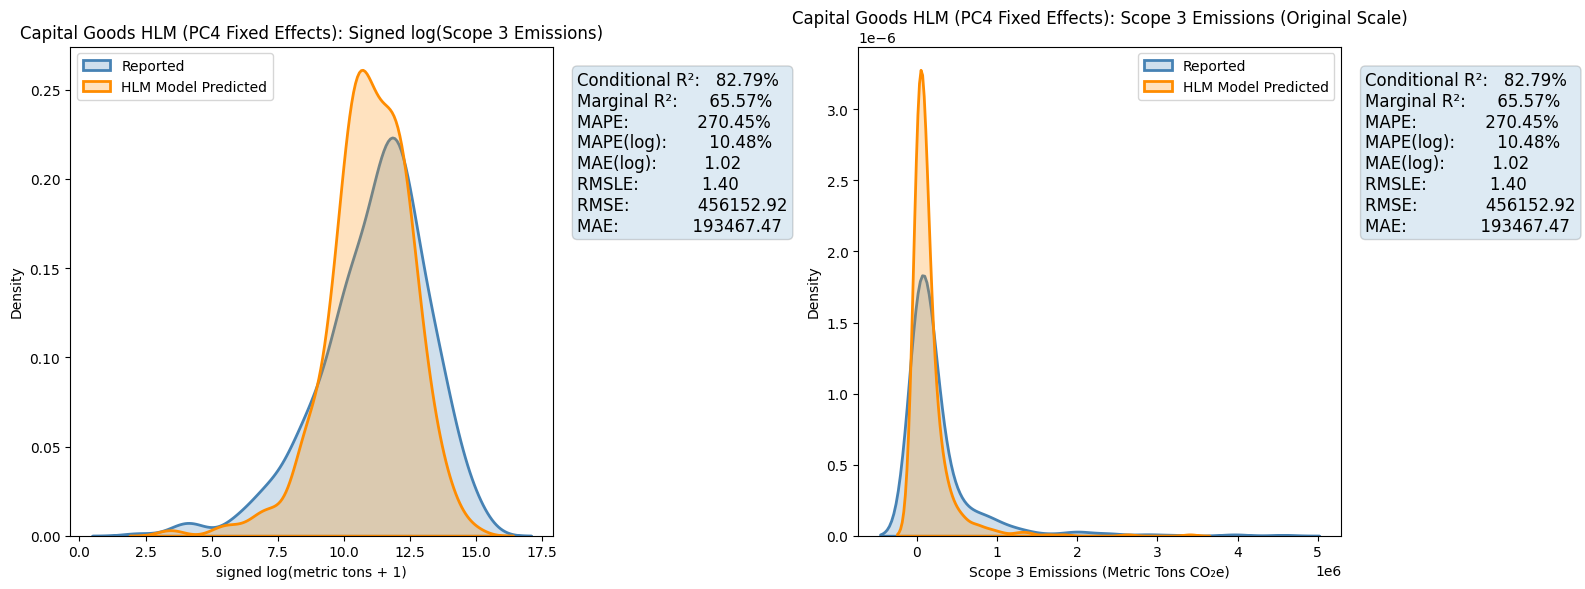

Histogram y_true min/max: 8.260000000000002 4563000.000000001
Histogram y_pred min/max: 24.7452549695871 3404914.407217658


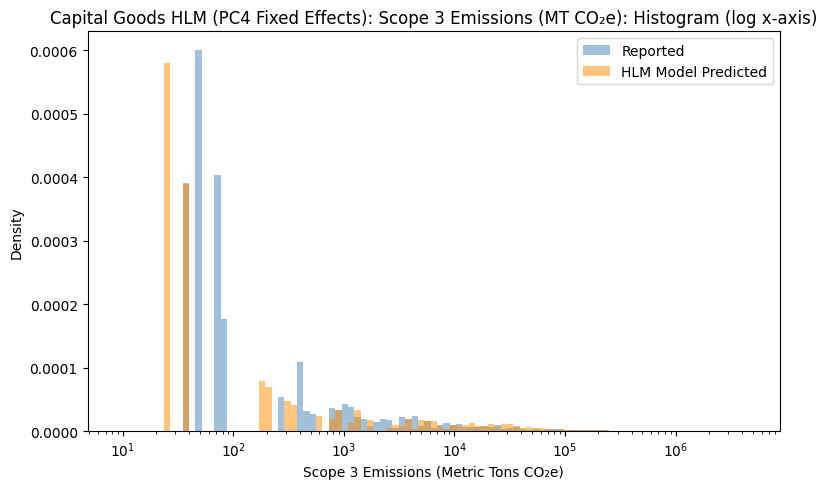

In [15]:
# --- PC4 HLM (using only PC4 features, with train_df and test_df already created) ---

feature_cols_pc4 = [f'PC4_{i}' for i in range(1, 5)]
target_col_pc4 = 'slog_Scope_3_emissions_amount'
cat_cols_pc4 = ['Countries', 'Year', 'account_id', 'Primary_activity']
all_model_vars_pc4 = feature_cols_pc4 + [target_col_pc4] + cat_cols_pc4

train_df_pc4 = train_df.dropna(subset=all_model_vars_pc4).copy()
test_df_pc4 = test_df.dropna(subset=all_model_vars_pc4).copy()

# --- Center Year ---
year_mean = train_df_pc4['Year'].mean()
train_df_pc4['Year_centered'] = train_df_pc4['Year'] - year_mean
test_df_pc4['Year_centered'] = test_df_pc4['Year'] - year_mean

# Ensure all categorical levels in test are present in train
for cat_col in ['Countries', 'Primary_activity']:
    train_cats = set(train_df_pc4[cat_col].unique())
    n_before = len(test_df_pc4)
    test_df_pc4 = test_df_pc4[test_df_pc4[cat_col].isin(train_cats)]
    n_after = len(test_df_pc4)
    if n_after < n_before:
        print(f"Warning: Dropped {n_before - n_after} test rows with unseen {cat_col} categories.")

if test_df_pc4.empty:
    print("WARNING: The filtered test set is empty. No predictions or metrics can be computed.")
else:
    fixed_effects = (
        ' + '.join(feature_cols_pc4) +
        ' + C(Countries) + C(Primary_activity) + Year_centered'
    )
    formula = f'{target_col_pc4} ~ {fixed_effects}'

    with warnings.catch_warnings():
        warnings.filterwarnings("ignore")
        md = smf.mixedlm(formula, data=train_df_pc4, groups=train_df_pc4['account_id'])
        mdf_pc4 = md.fit(reml=False, method='nm', maxiter=500, full_output=True)
    print(mdf_pc4.summary())

    var_fixed = np.var(mdf_pc4.fittedvalues)
    var_resid = mdf_pc4.scale
    var_random = mdf_pc4.cov_re.iloc[0, 0] if mdf_pc4.cov_re.shape[0] > 0 else 0.0
    var_random_total = var_random

    r2_marginal = var_fixed / (var_fixed + var_random_total + var_resid)
    r2_conditional = (var_fixed + var_random_total) / (var_fixed + var_random_total + var_resid)

    print(f"Marginal R² (fixed only):      {r2_marginal:.4f}")
    print(f"Conditional R² (fixed+random): {r2_conditional:.4f}")

    test_df_pc4['predicted_log'] = mdf_pc4.predict(test_df_pc4)
    test_df_pc4['predicted'] = np.sign(test_df_pc4['predicted_log']) * (np.expm1(np.abs(test_df_pc4['predicted_log'])))

    y_true_log = test_df_pc4[target_col_pc4]
    y_pred_log = test_df_pc4['predicted_log']
    y_true = np.sign(y_true_log) * (np.expm1(np.abs(y_true_log)))
    y_pred = test_df_pc4['predicted']

    mask = (
        np.isfinite(y_true_log) & np.isfinite(y_pred_log) &
        np.isfinite(y_true) & np.isfinite(y_pred)
    )
    y_true_log = y_true_log[mask]
    y_pred_log = y_pred_log[mask]
    y_true = y_true[mask]
    y_pred = y_pred[mask]

    r2_log_pct = r2_score(y_true_log, y_pred_log) * 100
    r2_pct = r2_score(y_true, y_pred) * 100
    mape_log = np.mean(np.abs((y_true_log - y_pred_log) / np.clip(y_true_log, 1e-8, None))) * 100
    mape_orig = np.mean(np.abs((y_true - y_pred) / np.clip(y_true, 1e-8, None))) * 100
    rmsle = np.sqrt(mean_squared_log_error(np.abs(y_true) + 1, np.abs(y_pred) + 1))
    rmse_orig = np.sqrt(mean_squared_error(y_true, y_pred))
    mae_orig = mean_absolute_error(y_true, y_pred)
    mae_log = mean_absolute_error(y_true_log, y_pred_log)

    metrics_text = (
        f"Conditional R²:   {r2_conditional*100:.2f}%\n"
        f"Marginal R²:      {r2_marginal*100:.2f}%\n"
        f"MAPE:             {mape_orig:.2f}%\n"
        f"MAPE(log):        {mape_log:.2f}%\n"
        f"MAE(log):         {mae_log:.2f}\n"
        f"RMSLE:            {rmsle:.2f}\n"
        f"RMSE:             {rmse_orig:.2f}\n"
        f"MAE:              {mae_orig:.2f}"
    )

    print("\nCapital Goods HLM with PC4 Fixed Effects: Test Set Performance Metrics:")
    print(metrics_text)

    coef_df = pd.DataFrame({
        'coef': mdf_pc4.params,
        'pvalue': mdf_pc4.pvalues
    }).drop(index="Intercept", errors='ignore').sort_values(by="pvalue")
    print("\nTop Influential Features (by p-value):")
    print(coef_df.head(10))
    print("\nAll feature coefficients sorted by absolute value:")
    print(coef_df.reindex(coef_df['coef'].abs().sort_values(ascending=False).index))

    fig, axes = plt.subplots(1, 2, figsize=(16, 6))
    if y_pred_log.nunique() > 1:
        sns.kdeplot(y_true_log, label='Reported', linewidth=2, fill=True, ax=axes[0], color='steelblue')
        sns.kdeplot(y_pred_log, label='HLM Model Predicted', linewidth=2, fill=True, ax=axes[0], color='darkorange')
    else:
        sns.kdeplot(y_true_log, label='Reported', linewidth=2, fill=True, ax=axes[0], color='steelblue')
        axes[0].plot([], [], ' ', label="Predicted: constant value (no KDE)")
    axes[0].set_title("Capital Goods HLM (PC4 Fixed Effects): Signed log(Scope 3 Emissions)")
    axes[0].set_xlabel("signed log(metric tons + 1)")
    axes[0].set_ylabel("Density")
    axes[0].legend()
    axes[0].text(1.05, 0.95, metrics_text, transform=axes[0].transAxes,
                 verticalalignment='top', fontsize=12, bbox=dict(boxstyle='round', alpha=0.15))
    if y_pred.nunique() > 1:
        sns.kdeplot(y_true, label='Reported', linewidth=2, fill=True, ax=axes[1], color='steelblue')
        sns.kdeplot(y_pred, label='HLM Model Predicted', linewidth=2, fill=True, ax=axes[1], color='darkorange')
    else:
        sns.kdeplot(y_true, label='Reported', linewidth=2, fill=True, ax=axes[1], color='steelblue')
        axes[1].plot([], [], ' ', label="Predicted: constant value (no KDE)")
    axes[1].set_title("Capital Goods HLM (PC4 Fixed Effects): Scope 3 Emissions (Original Scale)")
    axes[1].set_xlabel("Scope 3 Emissions (Metric Tons CO₂e)")
    axes[1].set_ylabel("Density")
    axes[1].legend()
    axes[1].text(1.05, 0.95, metrics_text, transform=axes[1].transAxes,
                 verticalalignment='top', fontsize=12, bbox=dict(boxstyle='round', alpha=0.15))
    plt.tight_layout()
    plt.show()

    valid_hist_mask = np.isfinite(y_true) & np.isfinite(y_pred) & (y_true > 0) & (y_pred > 0)
    y_true_hist = y_true[valid_hist_mask]
    y_pred_hist = y_pred[valid_hist_mask]
    print("Histogram y_true min/max:", y_true_hist.min() if len(y_true_hist)>0 else "empty", y_true_hist.max() if len(y_true_hist)>0 else "empty")
    print("Histogram y_pred min/max:", y_pred_hist.min() if len(y_pred_hist)>0 else "empty", y_pred_hist.max() if len(y_pred_hist)>0 else "empty")

    if len(y_true_hist) > 0 and len(y_pred_hist) > 0:
        min_val = min(y_true_hist.min(), y_pred_hist.min())
        max_val = max(y_true_hist.max(), y_pred_hist.max())
        if np.isfinite(min_val) and np.isfinite(max_val) and (min_val + 1) > 0 and (max_val + 1) > 0:
            log_bins = np.logspace(np.log10(min_val + 1), np.log10(max_val + 1), 100)
            plt.figure(figsize=(8, 5))
            sns.histplot(y_true_hist, bins=log_bins, stat="density", color="steelblue", alpha=0.5, label="Reported")
            sns.histplot(y_pred_hist, bins=log_bins, stat="density", color="darkorange", alpha=0.5, label="HLM Model Predicted")
            plt.xscale("log")
            plt.title("Capital Goods HLM (PC4 Fixed Effects): Scope 3 Emissions (MT CO₂e): Histogram (log x-axis)")
            plt.xlabel("Scope 3 Emissions (Metric Tons CO₂e)")
            plt.ylabel("Density")
            plt.legend()
            plt.tight_layout()
            plt.show()
        else:
            print("Error: min_val or max_val invalid for log scaling.")
    else:
        print("Error: No valid y_true/y_pred values for histogram.")

    pc4_model_metrics = {
        "Model": "HLM PC4",
        "Conditional_R2": r2_conditional,
        "Marginal_R2": r2_marginal,
        "RMSE": rmse_orig,
        "MAE": mae_orig,
        "MAE_log": mae_log,
        "RMSLE": rmsle,
        "MAPE": mape_orig,
        "# Obs (train)": len(train_df_pc4),
        "# Obs (test)": len(test_df_pc4),
        "# Obs (train/test)": f"{len(train_df_pc4)}/{len(test_df_pc4)}"
    } 

In [18]:
print("y_true min/max:", y_true.min(), y_true.max())
print("y_pred min/max:", y_pred.min(), y_pred.max())
print("Any NaNs in y_true?", np.any(np.isnan(y_true)))
print("Any NaNs in y_pred?", np.any(np.isnan(y_pred)))
print("Any Infs in y_true?", np.any(np.isinf(y_true)))
print("Any Infs in y_pred?", np.any(np.isinf(y_pred)))
print("# Obs (train):", len(train_df_pc4))
print("# Obs (test):", len(test_df_pc4))

y_true min/max: 8.260000000000002 4563000.000000001
y_pred min/max: 24.7452549695871 3404914.407217658
Any NaNs in y_true? False
Any NaNs in y_pred? False
Any Infs in y_true? False
Any Infs in y_pred? False
# Obs (train): 2218
# Obs (test): 521


Warnings still present with PC4, indicating model instability.

### Appending Cluster Labels to Train/Test Sets (Capital Goods, PC4 Features)

- Performs hierarchical clustering on standardized PC4 principal components (`PC4_1`–`PC4_4`) using Ward linkage.
- Finds the optimal number of clusters using silhouette scores, then assigns cluster labels to each valid observation.
- Appends the calculated `Cluster` label back to the main capital goods DataFrame.
- Adds the `Cluster` feature to both `train_df` and `test_df` using matching indices for downstream modeling and analysis.

_Result:_  
Both `train_df` and `test_df` have a new `Cluster` column based on hierarchical clustering of PC4 features.

Optimal number of clusters (highest silhouette score): 3


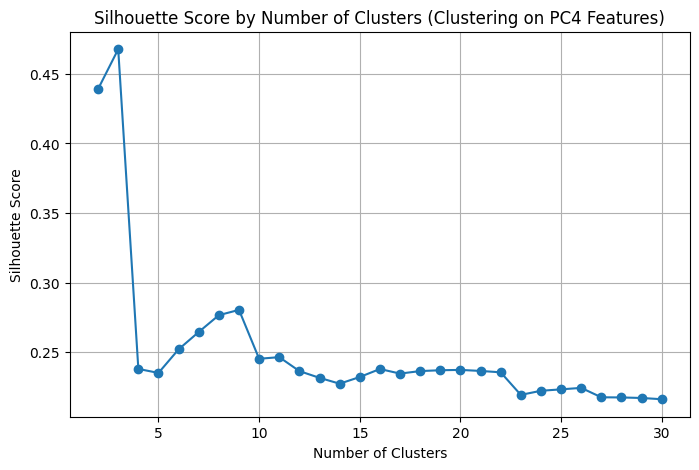

Number of observations in each cluster:
3    2497
1     233
2      64
Name: count, dtype: int64


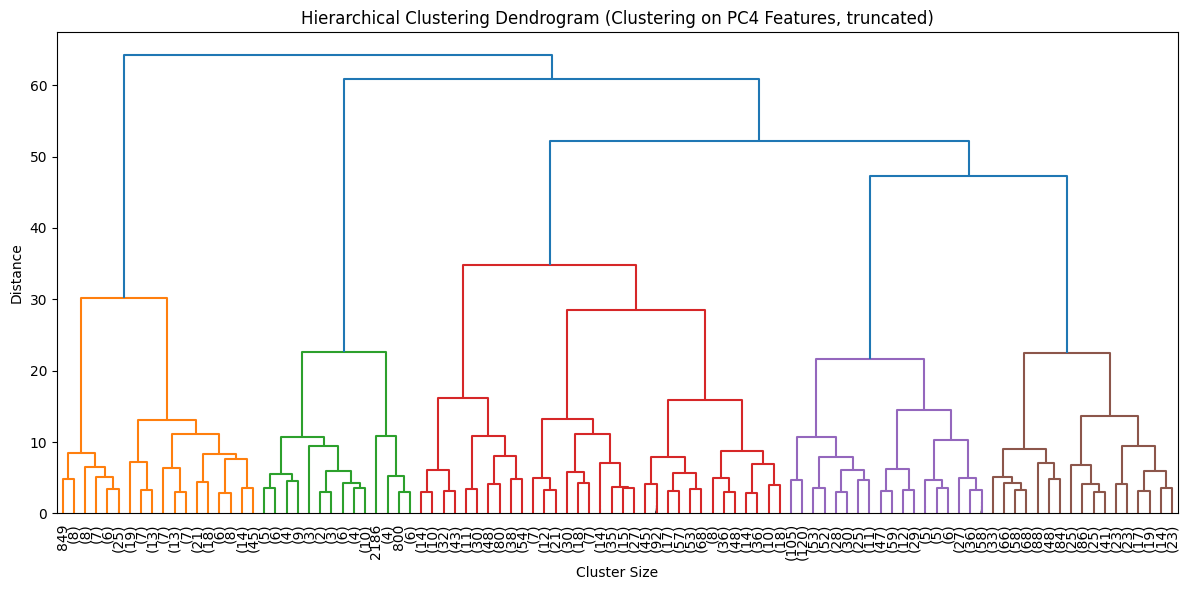

In [19]:
# --- STEP 1: Select PC4 PCA components for clustering ---
pc4_cols = [f'PC4_{i}' for i in range(1, 5)]
X_pc4 = capital_goods_pca[pc4_cols].dropna()
clust_indices = X_pc4.index

# --- STEP 2: Standardize the PC4 data ---
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_pc4)

# --- STEP 3: Hierarchical clustering (Ward linkage) ---
Z = linkage(X_scaled, method='ward')

# --- STEP 4: Find optimal number of clusters using silhouette score ---
range_n_clusters = range(2, 31)  # 2 to 30 clusters
sil_scores = []

for n_clusters in range_n_clusters:
    labels = fcluster(Z, n_clusters, criterion='maxclust')
    score = silhouette_score(X_scaled, labels)
    sil_scores.append(score)

optimal_n_clusters = range_n_clusters[np.argmax(sil_scores)]
print(f"Optimal number of clusters (highest silhouette score): {optimal_n_clusters}")

# --- Plot silhouette scores ---
plt.figure(figsize=(8,5))
plt.plot(range_n_clusters, sil_scores, marker='o')
plt.title('Silhouette Score by Number of Clusters (Clustering on PC4 Features)')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.grid(True)
plt.show()

# --- STEP 5: Assign optimal cluster labels ---
labels_optimal = fcluster(Z, optimal_n_clusters, criterion='maxclust')

# --- STEP 6: Append cluster labels back to original DataFrame (only for valid rows) ---
capital_goods_pca_clusters = capital_goods_pca.copy()
capital_goods_pca_clusters['Cluster'] = np.nan  # initialize with NaN
capital_goods_pca_clusters.loc[clust_indices, 'Cluster'] = labels_optimal

# --- Print cluster counts ---
print("Number of observations in each cluster:")
print(pd.Series(labels_optimal).value_counts())

# --- Optionally plot dendrogram (subset for readability) ---
plt.figure(figsize=(12, 6))
sample_size = min(100, len(X_scaled))  # Plot up to 100 samples for clarity
dendrogram(Z, truncate_mode='lastp', p=sample_size, leaf_rotation=90, leaf_font_size=10, show_contracted=True)
plt.title('Hierarchical Clustering Dendrogram (Clustering on PC4 Features, truncated)')
plt.xlabel('Cluster Size')
plt.ylabel('Distance')
plt.tight_layout()
plt.show()

# --- STEP 7: Append 'Cluster' to train_df and test_df ---
# Use the index to align clusters, so companies/years get correct cluster assignments
train_df = train_df.copy()
test_df = test_df.copy()

train_df['Cluster'] = capital_goods_pca_clusters.loc[train_df.index, 'Cluster']
test_df['Cluster'] = capital_goods_pca_clusters.loc[test_df.index, 'Cluster']

In [20]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2491 entries, 0 to 2490
Data columns (total 44 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   account_name                   2491 non-null   object 
 1   account_id                     2491 non-null   int64  
 2   Year                           2491 non-null   int64  
 3   Countries                      2491 non-null   object 
 4   Primary_activity               2491 non-null   object 
 5   Primary_sector                 2491 non-null   object 
 6   Market_Cap_USD                 2222 non-null   float64
 7   Revenue_USD                    2257 non-null   float64
 8   ebitda_USD                     2257 non-null   float64
 9   grossProfit_USD                2257 non-null   float64
 10  netIncome_USD                  2257 non-null   float64
 11  cashAndCashEquivalents_USD     2257 non-null   float64
 12  shortTermInvestments_USD       2257 non-null   float6

In [22]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 609 entries, 2491 to 3162
Data columns (total 44 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   account_name                   609 non-null    object 
 1   account_id                     609 non-null    int64  
 2   Year                           609 non-null    int64  
 3   Countries                      609 non-null    object 
 4   Primary_activity               609 non-null    object 
 5   Primary_sector                 609 non-null    object 
 6   Market_Cap_USD                 540 non-null    float64
 7   Revenue_USD                    528 non-null    float64
 8   ebitda_USD                     528 non-null    float64
 9   grossProfit_USD                528 non-null    float64
 10  netIncome_USD                  528 non-null    float64
 11  cashAndCashEquivalents_USD     528 non-null    float64
 12  shortTermInvestments_USD       528 non-null    floa

### Hierarchical Linear Mixed Model (HLM) — Capital Goods (PC4 + Cluster Features)

- Uses `train_df` (years 2018–2022) and `test_df` (year 2023), both with appended PC4 principal components and optimal `Cluster` labels.
- Model predictors: four principal components (`PC4_1`–`PC4_4`), `Cluster`, country, activity, and year.
- Drops incomplete rows and ensures all categorical levels in test are present in training.
- Fits a mixed-effects model grouped by company (`account_id`), computes marginal and conditional R², and evaluates predictions with standard metrics (MAPE, MAE, RMSE, RMSLE, etc.).
- Visualizes prediction results and feature coefficients.
- Returns metrics for downstream summary tables.

_Result:_  
A robust HLM using PC4 and cluster features for capital goods, evaluated on a company-level train/test split.

/Users/amberjensen/anaconda3/lib/python3.11/site-packages/statsmodels/regression/mixed_linear_model.py:2704: RuntimeWarning: invalid value encountered in sqrt
  sdf[0:self.k_fe, 1] = np.sqrt(np.diag(self.cov_params()[0:self.k_fe]))
/Users/amberjensen/anaconda3/lib/python3.11/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: overflow encountered in expm1
  result = getattr(ufunc, method)(*inputs, **kwargs)


                                                                     Mixed Linear Model Regression Results
Model:                                              MixedLM                                  Dependent Variable:                                  slog_Scope_3_emissions_amount
No. Observations:                                   2218                                     Method:                                              ML                           
No. Groups:                                         576                                      Scale:                                               0.9691                       
Min. group size:                                    1                                        Log-Likelihood:                                      -3549.6290                   
Max. group size:                                    5                                        Converged:                                           No                           
Mean group si

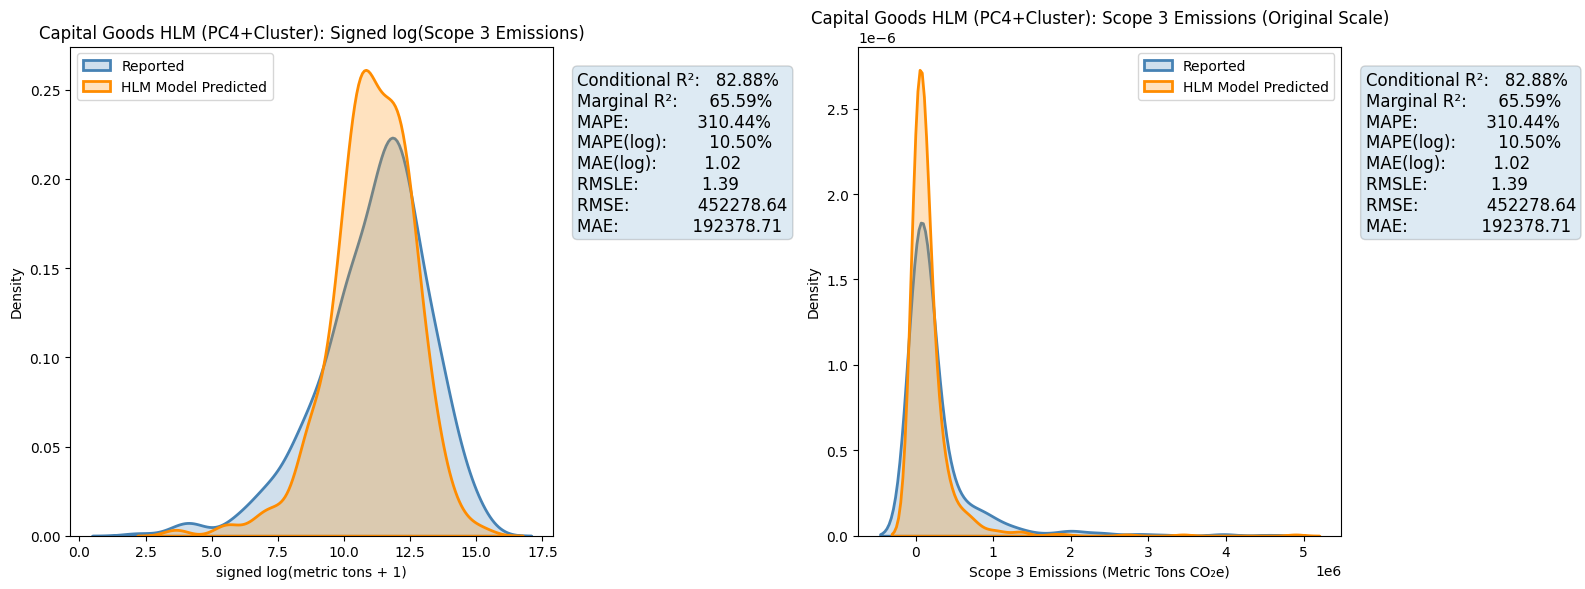

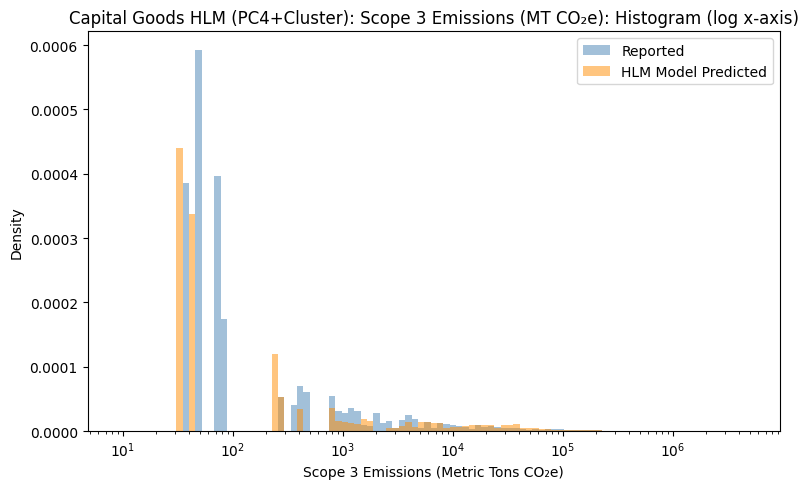

In [23]:
# --- PC4 + Cluster HLM ---

feature_cols_pc4_cluster = [f'PC4_{i}' for i in range(1, 5)] + ['Cluster']
target_col = 'slog_Scope_3_emissions_amount'
cat_cols = ['Countries', 'Year', 'account_id', 'Primary_activity']
all_model_vars = feature_cols_pc4_cluster + [target_col] + cat_cols

# --- Prepare Data ---
train_df_pc4c = train_df.dropna(subset=all_model_vars).copy()
test_df_pc4c = test_df.dropna(subset=all_model_vars).copy()

# --- Ensure all categorical levels in test are present in train ---
for cat_col in ['Countries', 'Primary_activity', 'Cluster']:
    train_cats = set(train_df_pc4c[cat_col].unique())
    n_before = len(test_df_pc4c)
    test_df_pc4c = test_df_pc4c[test_df_pc4c[cat_col].isin(train_cats)]
    n_after = len(test_df_pc4c)
    if n_after < n_before:
        print(f"Warning: Dropped {n_before - n_after} test rows with unseen {cat_col} categories.")

if test_df_pc4c.empty:
    print("WARNING: The filtered test set is empty. No predictions or metrics can be computed.")
else:
    # --- Model formula ---
    fixed_effects = (
        ' + '.join([f'C({col})' if col == 'Cluster' else col for col in feature_cols_pc4_cluster]) +
        ' + C(Countries) + C(Primary_activity) + Year'
    )
    formula = f'{target_col} ~ {fixed_effects}'

    # --- Fit the mixed-effects model ---
    with warnings.catch_warnings():
        warnings.filterwarnings("ignore")
        md = smf.mixedlm(formula, data=train_df_pc4c, groups=train_df_pc4c['account_id'])
        mdf_pc4c = md.fit(reml=False)
    print(mdf_pc4c.summary())

    # --- Calculate Conditional and Marginal R² ---
    var_fixed = np.var(mdf_pc4c.fittedvalues)
    var_resid = mdf_pc4c.scale
    var_random = mdf_pc4c.cov_re.iloc[0, 0] if mdf_pc4c.cov_re.shape[0] > 0 else 0.0
    var_random_total = var_random

    r2_marginal = var_fixed / (var_fixed + var_random_total + var_resid)
    r2_conditional = (var_fixed + var_random_total) / (var_fixed + var_random_total + var_resid)

    print(f"Marginal R² (fixed only):      {r2_marginal:.4f}")
    print(f"Conditional R² (fixed+random): {r2_conditional:.4f}")

    # --- Predict on test set ---
    test_df_pc4c['predicted_log'] = mdf_pc4c.predict(test_df_pc4c)
    test_df_pc4c['predicted'] = np.sign(test_df_pc4c['predicted_log']) * (np.expm1(np.abs(test_df_pc4c['predicted_log'])))

    # --- Metrics ---
    y_true_log = test_df_pc4c[target_col]
    y_pred_log = test_df_pc4c['predicted_log']
    y_true = np.sign(y_true_log) * (np.expm1(np.abs(y_true_log)))
    y_pred = test_df_pc4c['predicted']

    mask = (
        np.isfinite(y_true_log) & np.isfinite(y_pred_log) &
        np.isfinite(y_true) & np.isfinite(y_pred)
    )
    y_true_log = y_true_log[mask]
    y_pred_log = y_pred_log[mask]
    y_true = y_true[mask]
    y_pred = y_pred[mask]

    r2_log_pct = r2_score(y_true_log, y_pred_log) * 100
    r2_pct = r2_score(y_true, y_pred) * 100
    mape_log = np.mean(np.abs((y_true_log - y_pred_log) / np.clip(y_true_log, 1e-8, None))) * 100
    mape_orig = np.mean(np.abs((y_true - y_pred) / np.clip(y_true, 1e-8, None))) * 100
    rmsle = np.sqrt(mean_squared_log_error(np.abs(y_true) + 1, np.abs(y_pred) + 1))
    rmse_orig = np.sqrt(mean_squared_error(y_true, y_pred))
    mae_orig = mean_absolute_error(y_true, y_pred)
    mae_log = mean_absolute_error(y_true_log, y_pred_log)

    metrics_text = (
        f"Conditional R²:   {r2_conditional*100:.2f}%\n"
        f"Marginal R²:      {r2_marginal*100:.2f}%\n"
        f"MAPE:             {mape_orig:.2f}%\n"
        f"MAPE(log):        {mape_log:.2f}%\n"
        f"MAE(log):         {mae_log:.2f}\n"
        f"RMSLE:            {rmsle:.2f}\n"
        f"RMSE:             {rmse_orig:.2f}\n"
        f"MAE:              {mae_orig:.2f}"
    )

    print("\nCapital Goods HLM with PC4+Cluster Fixed Effects: Test Set Performance Metrics:")
    print(metrics_text)

    # --- Feature coefficients ---
    coef_df = pd.DataFrame({
        'coef': mdf_pc4c.params,
        'pvalue': mdf_pc4c.pvalues
    }).drop(index="Intercept", errors='ignore').sort_values(by="pvalue")
    print("\nTop Influential Features (by p-value):")
    print(coef_df.head(10))
    print("\nAll feature coefficients sorted by absolute value:")
    print(coef_df.reindex(coef_df['coef'].abs().sort_values(ascending=False).index))

    # --- Visualization ---
    fig, axes = plt.subplots(1, 2, figsize=(16, 6))
    if y_pred_log.nunique() > 1:
        sns.kdeplot(y_true_log, label='Reported', linewidth=2, fill=True, ax=axes[0], color='steelblue')
        sns.kdeplot(y_pred_log, label='HLM Model Predicted', linewidth=2, fill=True, ax=axes[0], color='darkorange')
    else:
        sns.kdeplot(y_true_log, label='Reported', linewidth=2, fill=True, ax=axes[0], color='steelblue')
        axes[0].plot([], [], ' ', label="Predicted: constant value (no KDE)")
    axes[0].set_title("Capital Goods HLM (PC4+Cluster): Signed log(Scope 3 Emissions)")
    axes[0].set_xlabel("signed log(metric tons + 1)")
    axes[0].set_ylabel("Density")
    axes[0].legend()
    axes[0].text(1.05, 0.95, metrics_text, transform=axes[0].transAxes,
                 verticalalignment='top', fontsize=12, bbox=dict(boxstyle='round', alpha=0.15))
    if y_pred.nunique() > 1:
        sns.kdeplot(y_true, label='Reported', linewidth=2, fill=True, ax=axes[1], color='steelblue')
        sns.kdeplot(y_pred, label='HLM Model Predicted', linewidth=2, fill=True, ax=axes[1], color='darkorange')
    else:
        sns.kdeplot(y_true, label='Reported', linewidth=2, fill=True, ax=axes[1], color='steelblue')
        axes[1].plot([], [], ' ', label="Predicted: constant value (no KDE)")
    axes[1].set_title("Capital Goods HLM (PC4+Cluster): Scope 3 Emissions (Original Scale)")
    axes[1].set_xlabel("Scope 3 Emissions (Metric Tons CO₂e)")
    axes[1].set_ylabel("Density")
    axes[1].legend()
    axes[1].text(1.05, 0.95, metrics_text, transform=axes[1].transAxes,
                 verticalalignment='top', fontsize=12, bbox=dict(boxstyle='round', alpha=0.15))
    plt.tight_layout()
    plt.show()
    min_val = min(y_true.min(), y_pred.min())
    max_val = max(y_true.max(), y_pred.max())
    log_bins = np.logspace(np.log10(min_val + 1), np.log10(max_val + 1), 100)
    plt.figure(figsize=(8, 5))
    sns.histplot(y_true, bins=log_bins, stat="density", color="steelblue", alpha=0.5, label="Reported")
    sns.histplot(y_pred, bins=log_bins, stat="density", color="darkorange", alpha=0.5, label="HLM Model Predicted")
    plt.xscale("log")
    plt.title("Capital Goods HLM (PC4+Cluster): Scope 3 Emissions (MT CO₂e): Histogram (log x-axis)")
    plt.xlabel("Scope 3 Emissions (Metric Tons CO₂e)")
    plt.ylabel("Density")
    plt.legend()
    plt.tight_layout()
    plt.show()

    # --- Return metrics for summary table ---
    pc4_cluster_model_metrics = {
        "Model": "HLM PC4+Cluster",
        "Conditional_R2": r2_conditional,
        "Marginal_R2": r2_marginal,
        "RMSE": rmse_orig,
        "MAE": mae_orig,
        "MAE_log": mae_log,
        "RMSLE": rmsle,
        "MAPE": mape_orig,
        "# Obs (train)": len(train_df_pc4c),
        "# Obs (test)": len(test_df_pc4c),
        "# Obs (train/test)": f"{len(train_df_pc4c)}/{len(test_df_pc4c)}"
    }

In [24]:
print("y_true min/max:", y_true.min(), y_true.max())
print("y_pred min/max:", y_pred.min(), y_pred.max())
print("Any NaNs in y_true?", np.any(np.isnan(y_true)))
print("Any NaNs in y_pred?", np.any(np.isnan(y_pred)))
print("Any Infs in y_true?", np.any(np.isinf(y_true)))
print("Any Infs in y_pred?", np.any(np.isinf(y_pred)))
print("# Obs (train):", len(train_df_pc4c))
print("# Obs (test):", len(test_df_pc4c))

y_true min/max: 8.260000000000002 4563000.000000001
y_pred min/max: 33.609764971357215 4893915.179958444
Any NaNs in y_true? False
Any NaNs in y_pred? False
Any Infs in y_true? False
Any Infs in y_pred? False
# Obs (train): 2218
# Obs (test): 521


### Explanation of Common Runtime Warnings

#### 1. `RuntimeWarning: invalid value encountered in sqrt`

- **What it means:**  
  Your code tried to take the square root of a value that isn't valid (like a negative number or NaN).
- **Where it happened:**  
  While calculating standard errors from the covariance matrix in your model output.
- **Why it matters:**  
  Negative or NaN values in the covariance matrix usually mean your model fit is unstable or something went wrong in the calculations.
- **What to check:**  
  - Look for negative or missing values in model outputs.
  - Check your input data and model specification for issues.


#### 2. `RuntimeWarning: overflow encountered in expm1`

- **What it means:**  
  Your code tried to calculate `np.expm1(x)` (`exp(x) - 1`) for a value of `x` that is extremely large.
- **Where it happened:**  
  While transforming model predictions or data back to the original scale.
- **Why it matters:**  
  The result is too big for Python to store, so it becomes infinity (`inf`). This often points to outliers or problems with your data/model.
- **What to check:**  
  - Investigate if your model is producing extremely large values.
  - Look for outliers or errors in your predictions or transformations.
  - Consider limiting values before applying `expm1`.

---

**Summary:**  
These are warnings that the code is running into problematic values—either negative/NaN when taking a square root, or numbers too big to handle when exponentiating. These can indicate issues with the model fit or unusual data.

### Capital Goods HLM Metrics Summary

In [25]:
# Collect metrics dicts from each model; change names as needed
metrics_dicts = [
    PC9_model_metrics,         # "HLM PC9"
    PC7_model_metrics,         # "HLM PC7"
    pc4_model_metrics,         # "HLM PC4"
    pc4_cluster_model_metrics  # "HLM PC4+Cluster"
]

# Attach observation counts, convergence status, and explained variance to each dictionary
for metrics, train, test, fit_result, explained_var in zip(
        metrics_dicts,
        [train_df_PC9, train_df_PC7, train_df_pc4, train_df_pc4c],
        [test_df_PC9, test_df_PC7, test_df_pc4, test_df_pc4c],
        [mdf_PC9, mdf_PC7, mdf_pc4, mdf_pc4c],
        [
            sum(pca9.explained_variance_ratio_),
            sum(pca7.explained_variance_ratio_),
            sum(pca4.explained_variance_ratio_),
            sum(pca4.explained_variance_ratio_)
        ]):
    metrics["# Obs (train)"] = len(train)
    metrics["# Obs (test)"] = len(test)
    metrics["# Obs (train/test)"] = f"{len(train)}/{len(test)}"
    metrics["Converged"] = "Yes" if getattr(fit_result, "converged", False) else "No"
    metrics["PC Explained Variance"] = explained_var

# Add a new row for your "Optimized" model
optimized_row = {
    "Model": "Optimized Capital Goods HLM",
    "Conditional_R2": 0.8726,
    "Marginal_R2": 0.6135,
    "RMSE": 459329.58,
    "MAE": 194926.26,
    "MAE_log": 1.01,
    "RMSLE": 1.38,
    "MAPE": 300.85,
    "# Obs (train/test)": "2218/505",
    "PC Explained Variance": np.nan,
    "Converged": "Yes"
}
metrics_dicts.append(optimized_row)

metrics_df = pd.DataFrame(metrics_dicts)

# Order columns for summary (Converged LAST)
desired_order = [
    "Model", "PC Explained Variance", "Conditional_R2", "Marginal_R2", "RMSE", "MAE", "MAE_log", "RMSLE", "MAPE", "# Obs (train/test)", "Converged"
]

# Add MAE_log if missing
if "MAE_log" not in metrics_df.columns:
    metrics_df["MAE_log"] = np.nan

metrics_df = metrics_df[[col for col in desired_order if col in metrics_df.columns]]

# Format for display
metrics_df_display = metrics_df.copy()
if "Conditional_R2" in metrics_df_display.columns:
    metrics_df_display["Conditional_R2"] = (metrics_df_display["Conditional_R2"].astype(float) * 100).map("{:.2f}%".format)
if "Marginal_R2" in metrics_df_display.columns:
    metrics_df_display["Marginal_R2"] = (metrics_df_display["Marginal_R2"].astype(float) * 100).map("{:.2f}%".format)
for col in ["RMSE", "MAE", "MAE_log", "RMSLE", "MAPE", "PC Explained Variance"]:
    if col in metrics_df_display.columns:
        if col == "PC Explained Variance":
            metrics_df_display[col] = metrics_df_display[col].apply(lambda v: "{:.2%}".format(v) if pd.notnull(v) else "")
        else:
            metrics_df_display[col] = metrics_df_display[col].astype(float).map("{:.2f}".format)

# Display in notebook or print
try:
    display(metrics_df_display)
except Exception:
    print(metrics_df_display.to_string(index=False))

,Model,PC Explained Variance,Conditional_R2,Marginal_R2,RMSE,MAE,MAE_log,RMSLE,MAPE,# Obs (train/test),Converged
0,HLM PC9,90.73%,96.05%,24.18%,788139574.64,38325551.94,1.46,2.30,18146.41,2218/521,No
1,HLM PC7,83.36%,87.89%,60.79%,454585.76,190657.17,1.01,1.38,269.22,2218/521,Yes
2,HLM PC4,65.32%,82.79%,65.57%,456152.92,193467.47,1.02,1.40,270.45,2218/521,Yes
3,HLM PC4+Cluster,65.32%,82.88%,65.59%,452278.64,192378.71,1.02,1.39,310.44,2218/521,No
4,Optimized Capital Goods HLM,,87.26%,61.35%,459329.58,194926.26,1.01,1.38,300.85,2218/505,Yes
